In [3]:
# 矩阵相乘 [28,28] ->(flat) [784] => [1,784]
# X = [v1,v2,...v784]

# H1 = XW1 + b1 [1,784][d1,784]T + [d1] => [1,d1]+[d1]
# W1:[d1,dx]
# b1:[d1]
# H2 = H1W2 + b2
# ....

#Loss?
# H3:[1,d3]
# one-hot eg: 1=> [0,1,0,0,0,0,0,0,0]; 3=> [0,0,0,3,0,0,0,0,0]

# pred = W3 *{W2[W1X+b1]+b2}+b3

# Linear Combination?
# Non-linear Factor ReLU
# H1 = relu(XW1+b1)

In [4]:
# Gradient Descent
# object = (pred-Y) minimize object

#steps load data 
#build model
#tarin
#test

In [5]:
import torch
from matplotlib import pyplot as plt

In [6]:
def plot_curve(data):
    fig = plt.figure()
    plt.plot(range(len(data)),data,color="blue")
    plt.legend(['value'], loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.show()

In [7]:
def plot_image(img, label,name):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(img[i][0]*0.3081+0.1307, cmap='gray',interpolation='none')
        plt.title("{}:{}".format(name,label[i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [8]:
def one_hot(label, depth=10):
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1,1)
    out.scatter_(dim=1, index=idx,value=1)
    return out

In [9]:
from torch import nn
from torch.nn import functional as F
from torch import optim
import torchvision

In [10]:
# step1 load dataset
batch_size = 512
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data', train=True,download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(
                                  (0.1307,),(0.3081,))
                              ])),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data/', train=False,download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(
                                  (0.1307,),(0.3081,))
                              ])),
    batch_size=batch_size, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



In [13]:
x,y = next(iter(train_loader))
print(x.shape,y.shape,x.min(),x.max())

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


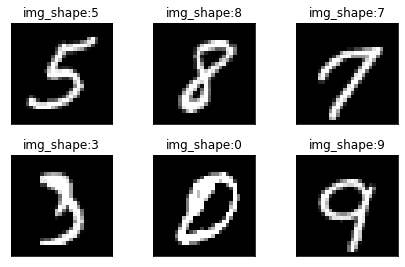

In [14]:
plot_image(x,y,'img_shape')

In [21]:
# build model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # xw + b
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        # x: (b,1,28,28)
        # h1 = relu(xw1+b1)
        x = F.relu(self.fc1(x))
        # h2 = relu(xw2+b2)
        x = F.relu(self.fc2(x))
        # h3 = h2w3+b3
        x = self.fc3(x)
        return x

In [ ]:
net = Net()
optimizer = optim.SGD(net.parameters(),lr = 0.01,momentum=0.9)
train_loss = []
for epoch in range(3):
    for batch_idx, (x,y) in enumerate(train_loader):
        #torch.Size([512, 1, 28, 28]) torch.Size([512])
        # [b,1,28,28] => [b,feature]
        x = x.view(x.size(0), 28*28)
        # => [b,10]
        out = net(x)
        y_onehot = one_hot(y)
        # loss = mse(out, y_onehot)
        loss = F.mse_loss(out, y_onehot)
        optimizer.zero_grad()
        loss.backward()
        # w' = w - lr*grad
        optimizer.step()
        train_loss.append(loss.item())
        if batch_idx % 10 ==0:
            print(epoch, batch_idx, loss.item())
# get optimal w1 b1 w2 b2 w3 b3

plot_curve(train_loss)
total_correct = 0
# accuracy-test
for x,y in test_loader:
    x = x.view(x.size(0), 28* 28)
    out = net(x)
    # out:[b,10]
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float()
    total_correct += correct
total_num = len(test_loader.dataset)
acc = total_correct / total_num
print('test acc',acc)


0 0 0.10674984753131866
0 10 0.09218548238277435
0 20 0.0833745151758194
0 30 0.07813899219036102
0 40 0.07367344945669174
0 50 0.06940324604511261
0 60 0.06380476802587509
0 70 0.06350833922624588
0 80 0.05886946991086006
0 90 0.05578433349728584
0 100 0.051656581461429596
0 110 0.049707334488630295
1 0 0.049459122121334076
1 10 0.048617105931043625
1 20 0.047826290130615234
1 30 0.04263174533843994
1 40 0.04521673172712326
1 50 0.04412517696619034
1 60 0.04211771488189697
1 70 0.04062895476818085
1 80 0.04207632690668106
1 90 0.03777190297842026
1 100 0.038810279220342636
1 110 0.038691598922014236
2 0 0.036687277257442474
2 10 0.03827022761106491
2 20 0.035478390753269196
2 30 0.036104049533605576
2 40 0.03691970184445381
2 50 0.033957578241825104
2 60 0.03594246879220009
2 70 0.03483960032463074
